<a href="https://colab.research.google.com/github/SomyaH99/Data_analysis_0f_Hotel_bookings/blob/main/Closing_Stock_price_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.~

**Data Description**

We've the YES BANK Stock price dataset which has the monthly stock prices of the bank since its inception. It contains the following features:

 **Date**: It denotes date of investment done (in our case we have month and year).

**Open**: Open means the price at which a stock started trading when the opening bell rang.

**High**: High refer to the maximum prices in a given time period.

**Low**: Low refer to the minimum prices in a given time period.

**Close**: Close refers to the price of an individual stock when the stock exchange closed for the day.

In [177]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = (10,6)
%matplotlib inline


In [178]:
#Import libraries for Regressor
import math
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso


In [179]:
from xgboost import XGBRegressor                       # xgboost model
from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR                            # support vector regressor
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV       # grid search to optimize parameters

from sklearn.metrics import (r2_score,                 # import required metrics
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)

In [180]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regression Capestone project/Closing Price Prediction dataset/data_YesBank_StockPrices.csv')

EDA

In [182]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [183]:
df.shape

(185, 5)

In [184]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


The Given Date in data is of format MMM-YY is converted to proper date of YYYY-MM-DD and given date column has dtype as object converting it into datetime format.

In [186]:
# Importing datetime 
from datetime import datetime
# converting date to proper format of date
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [187]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [188]:
#Setting f=date column as an index
df.set_index('Date', inplace= True)
df.index.freq = 'MS'

In [189]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


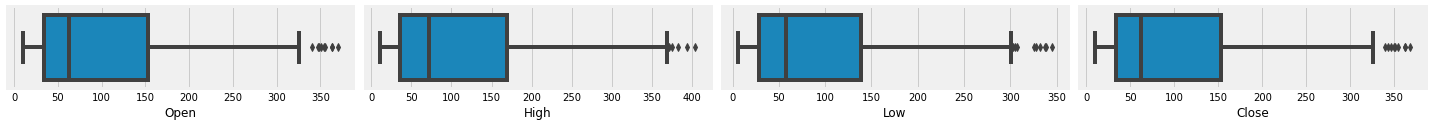

In [190]:
#Checking the outliers
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
x = 1 

for column in df.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(df[column])
    x+=1
    
plt.tight_layout()

Data visualization

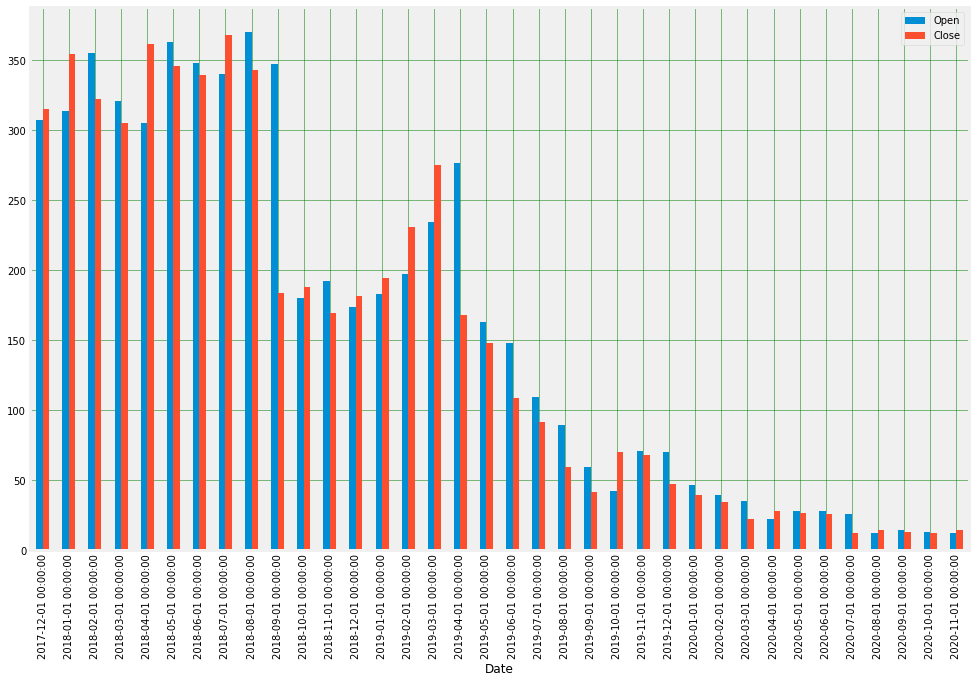

In [191]:
#Plot open v/s close prices of stock in each month 
df[['Open','Close']].tail(36).plot(kind='bar', figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color ='green')
plt.grid(which='minor',linewidth='0.5',color ='black')
plt.show()

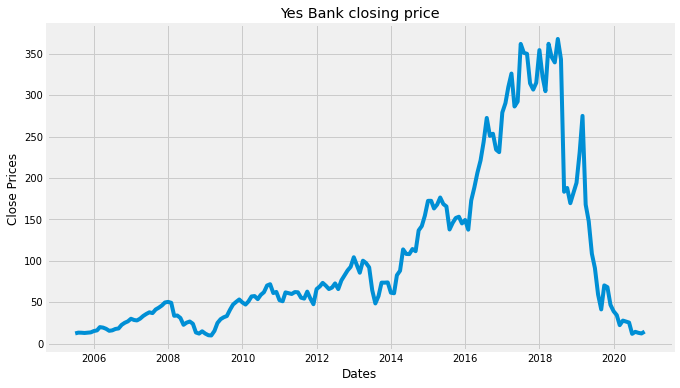

In [192]:
#plotting close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices ')
plt.plot(df['Close'])
plt.title('Yes Bank closing price')
plt.show()

Stock price decreased after the year 2018 probably because of the Rana Kapoor's Case.

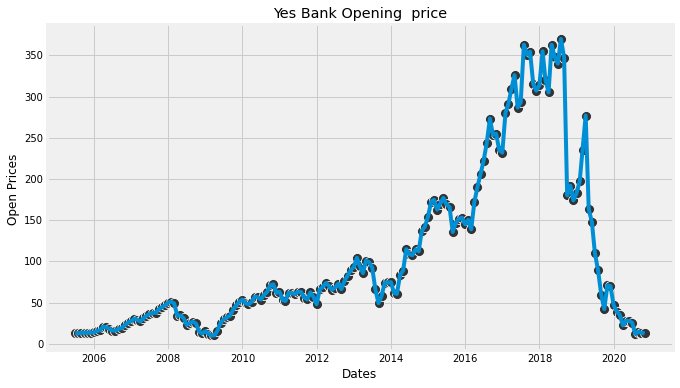

In [193]:
#plotting Open price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices ')
plt.plot(df['Open'])
plt.title('Yes Bank Opening  price')
sns.scatterplot(data=df, x="Date", y="Open", s=100, color=".2")

Same is the case with the opening prices of the stock. It has been decreased after the year 2018

We can conculde here that investing in prices after 2018 will not be a good idea becaue it will yeild low returns to the investors

In [194]:
#Creating set of numerical features.
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

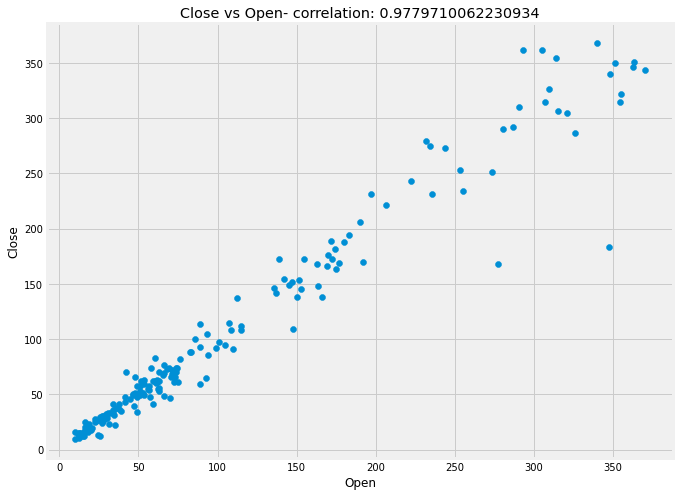

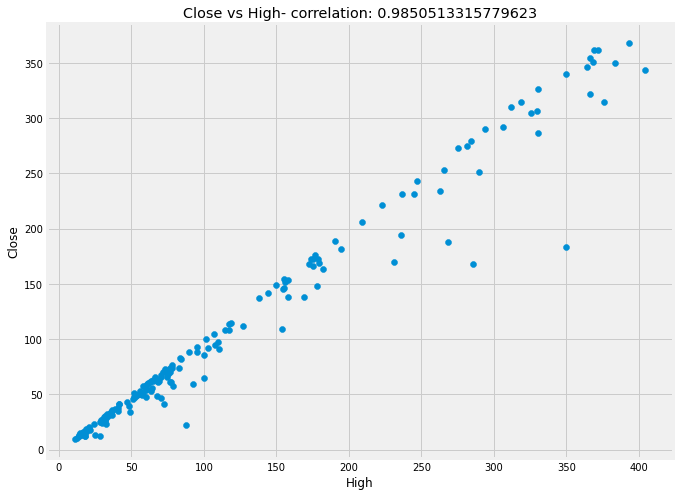

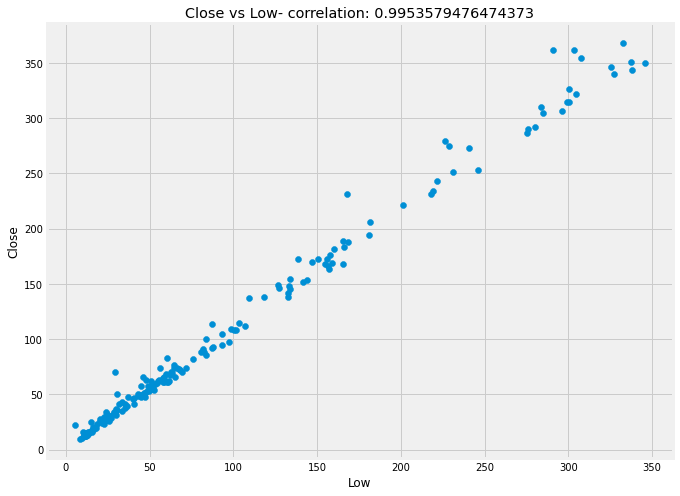

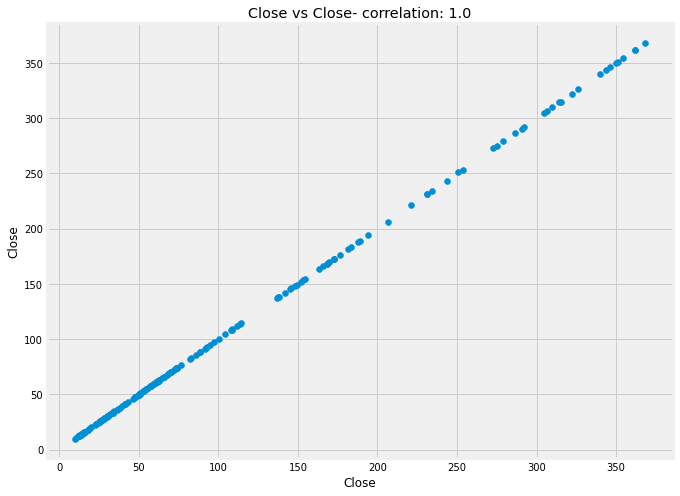

In [195]:
#relationship between the 2 columns
for col in numerical_features:
  fig=plt.figure(figsize=(10,8))
  ax=fig.gca()
  feature=df[col]
  label=df['Close']
  correlation= feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' +col +'- correlation: '+ str(correlation))


Bivariate analysis showed high correlation of close price with the other independent variable

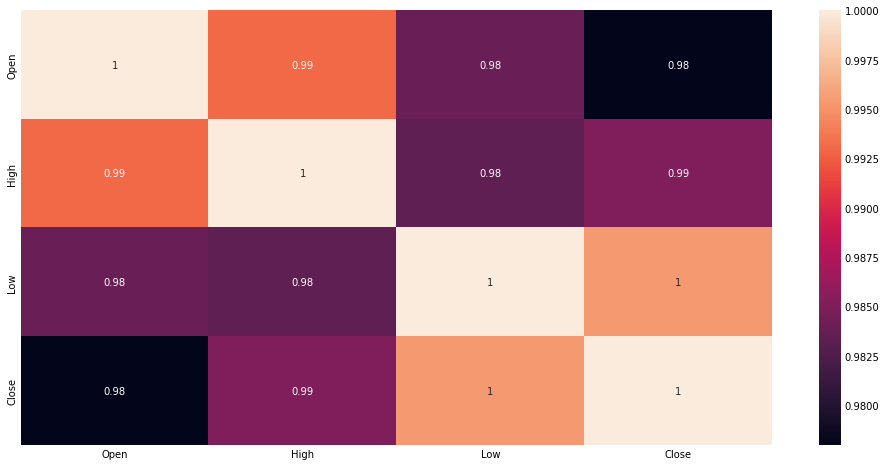

In [196]:
plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap=None)

In [197]:
#Creating set of numerical features.
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features


Index(['Open', 'High', 'Low', 'Close'], dtype='object')

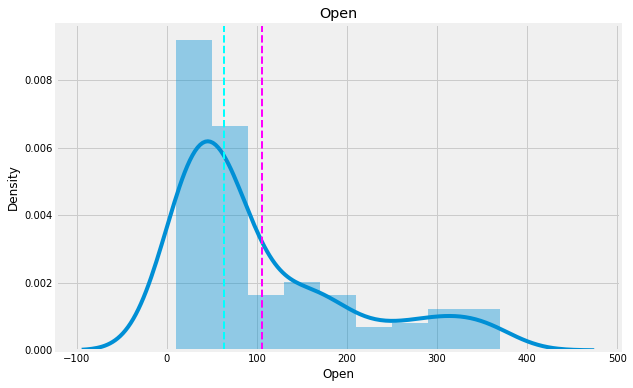

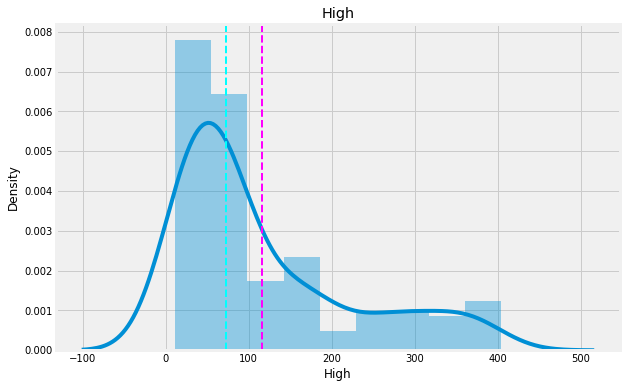

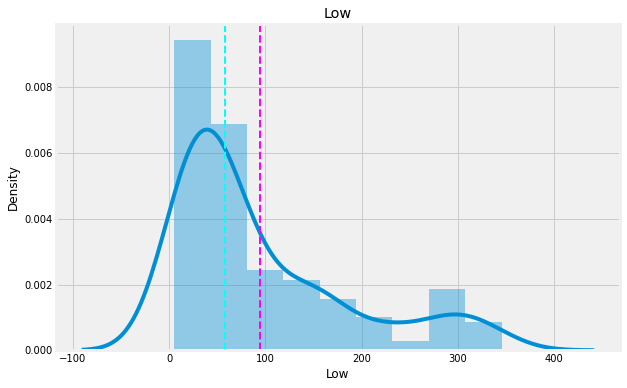

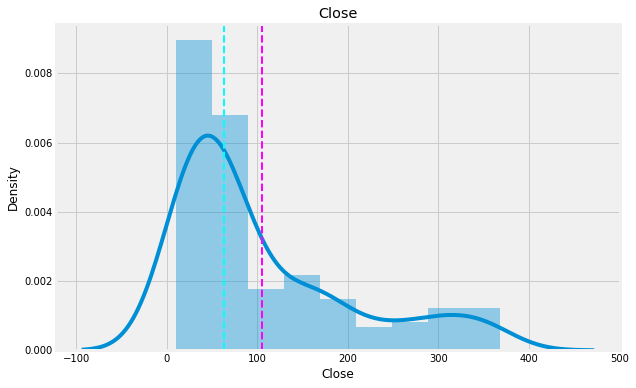

In [198]:
#plot a bar plot for each numerical feature count with Dist Plot
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

We can conclude from the above histogram plot that our data is right skewed

Model training

In [199]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [200]:
# x is independent variables and y is dependent variables
from scipy.stats import zscore
x =df.drop(columns=['Close']).apply(zscore)

In [201]:
#Dependent variable
y = np.log(df['Close'])

In [202]:
# Breaking off validation set or test set from training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [203]:
x_train[0:10]

,Open,High,Low
Date,,,
2010-06-01,-0.495287,-0.530001,-0.465501
2011-08-01,-0.432415,-0.491716,-0.488475
2015-07-01,0.643516,0.560849,0.676052
2017-08-01,2.610818,2.380253,2.664784
2015-05-01,0.653657,0.573863,0.690892
2006-12-01,-0.812692,-0.815161,-0.775485
2005-12-01,-0.933468,-0.958684,-0.900797
2016-05-01,0.854444,0.875996,0.948991
2015-09-01,0.304917,0.371497,0.352328


In [204]:
#Applying linear regression model
lr_model=LinearRegression()
#Fitting linear regression model
lr_model.fit(x_train,y_train)

LinearRegression()

In [205]:
lr_model.intercept_

4.212069446323324

In [206]:
lr_model.coef_

array([-0.10716459,  0.45581811,  0.53359888])

In [207]:
y_train

Date
2010-06-01    3.985831
2011-08-01    4.018363
2015-07-01    5.110420
2017-08-01    5.861213
2015-05-01    5.173434
                ...   
2016-08-01    5.607859
2016-12-01    5.443543
2011-07-01    4.129229
2017-03-01    5.735991
2008-08-01    3.289521
Name: Close, Length: 148, dtype: float64

In [208]:
# Predicting the Test set results
y_pred = lr_model.predict(x_test)

In [209]:
y_pred

array([3.49391228, 3.52783293, 3.76516474, 3.39721916, 4.63905176,
       6.31752415, 3.74404654, 3.49651427, 3.50803663, 3.73231975,
       4.78283823, 3.72005769, 3.3914954 , 6.07157627, 3.92325636,
       3.70791043, 3.51147284, 4.49922899, 4.18995637, 4.06229368,
       3.52669162, 3.40870323, 4.23407675, 3.77501504, 4.74301977,
       3.43092644, 3.40035682, 3.71642721, 3.53529622, 3.84289193,
       5.56699038, 6.35317412, 3.87437155, 5.40806313, 4.10458931,
       3.73974397, 5.3903701 ])

In [210]:
y_test

Date
2006-11-01    3.231595
2020-06-01    3.242592
2011-01-01    3.962526
2008-11-01    2.506342
2019-05-01    4.996874
2018-06-01    5.827768
2013-08-01    3.884652
2020-04-01    3.330417
2008-06-01    3.128951
2010-01-01    3.908818
2015-03-01    5.095650
2010-03-01    3.931237
2005-11-01    2.596001
2017-12-01    5.752731
2012-04-01    4.249495
2008-02-01    3.900355
2009-06-01    3.390473
2016-01-01    5.006493
2014-05-01    4.735233
2014-04-01    4.478926
2009-07-01    3.463546
2006-06-01    2.748552
2014-07-01    4.684074
2012-01-01    4.189503
2015-04-01    5.123726
2006-09-01    2.915606
2009-01-01    2.504709
2007-12-01    3.908216
2007-02-01    3.354455
2012-05-01    4.189958
2019-03-01    5.616953
2018-05-01    5.847017
2014-01-01    4.120500
2016-11-01    5.456517
2013-04-01    4.607966
2009-12-01    3.977998
2016-07-01    5.494871
Name: Close, dtype: float64

In [211]:
mean_squared_error(y_test, y_pred)

0.16744729744169928

In [212]:
y_pred_train = lr_model.predict(x_train)

In [213]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

0.42244370845275614

In [214]:
r2_score(y_train, y_pred_train)

0.8146653424416905

In [215]:
r2_score(y_test, y_pred)

0.8225699915389754

In [216]:
#Implementing ridge regression model
from sklearn.linear_model import Ridge
ridge= Ridge()

In [217]:
#Fitting the model
ridge.fit(x_train,y_train)

Ridge()

In [218]:
#Score 
ridge.score(x_train, y_train)

0.814278120922534

In [219]:
#Prediction
y_pred_r = ridge.predict(x_test)

In [220]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_r))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_r)))
print("MAE :",mean_absolute_error(y_test, y_pred_r))
print("R2 :",metrics.r2_score(y_test, y_pred_r))

MSE : 0.16978447744882538
RMSE : 0.4120491201893597
MAE : 0.3501850120549262
R2 : 0.8200934757947681


In [221]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,8,6,19,20,21,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 8, 6, 19, 20, 21, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [222]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -0.19213460468887036


In [223]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(x_test)

In [224]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",metrics.r2_score(y_test, y_pred_ridge))

MSE : 0.1746097263172454
RMSE : 0.41786328663481
MAE : 0.35417382836482214
R2 : 0.8149805599064218


The best R^2 score is 81.49% for Ridge regression model


In [225]:
#Applying Lasso Regression model
lasso  = Lasso(alpha=0.010 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [226]:
#Fitting lasso model
lasso.fit(x_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [227]:
# prediction for lasso model
y_pred_l = lasso.predict(x_test)

In [228]:
#performance metrics
print("MSE :",mean_squared_error(y_test, y_pred_l))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_l)))
print("MAE :",mean_absolute_error(y_test, y_pred_l))
print("R2 :",metrics.r2_score(y_test, y_pred_l))

MSE : 0.16979450921198339
RMSE : 0.41206129302809236
MAE : 0.35059764622064893
R2 : 0.8200828459676572


The best R^2 score is 82% for Lasso regression model

In [229]:
from sklearn.model_selection import GridSearchCV
### let's use  Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,0.05,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 0.05, 1, 5, 10, 20, 30, 40,
                                   45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [230]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.18659534773694864


In [231]:
#prediction
y_pred_lasso = lasso_regressor.predict(x_test)

In [232]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",metrics.r2_score(y_test, y_pred_lasso))

MSE : 0.16979450921198339
RMSE : 0.41206129302809236
MAE : 0.35059764622064893
R2 : 0.8200828459676572


Implementing the best parameters best R^2 score we have 82.00% for lasso regression model
